In [1]:
Did the wealthy men on the titanic get off before the poor women?

Object `women` not found.


In [ ]:
Did the wealthy men on the titanic get off before the poor women


#### Kate Cough
#### Project One: Titanic
#### July 2017

## Summary

I have a dataset with information about passengers on the Titanic that includes the fare they paid and whether they survived the sinking; I would like to calculate the relationship between ticket price and the likelihood that one survived. 

I'm imagining the final product to look like this:

## Details

Possible headline(s): 
Passengers who paid higher fares more likely to survive sinking of Titanic

Paying for to survive: passengers who paid higher fare more likely to survive Titanic sinking

Data set(s): From the department of Biostats at Vanderbilt (http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets), using information from Encyclopedia Titanica (https://www.encyclopedia-titanica.org/)

Code repository: https://github.com/jsoma/sample-pages/tree/master/code/a-very-cool-project

Possible problems/fears/questions: Calculating probabilities 


**Data Dictionary**

    survival: Survival	0 = No, 1 = Yes
    pclass: Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
    sex: Sex (male/female)	
    Age: Age in years	
    sibsp: # of siblings / spouses aboard the Titanic	
    parch: # of parents / children aboard the Titanic	
    ticket: Ticket number	
    fare: Passenger fare	
    cabin: Cabin number	
    embarked: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

**Variable Notes**

    pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower

    age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    sibsp: The dataset defines family relations in this way...
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)

    parch: The dataset defines family relations in this way...
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.

    source: https://www.kaggle.com/c/titanic/data

    the data came from here: https://www.encyclopedia-titanica.org/

In [38]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42

import numpy as np

plt.style.use('ggplot')
%matplotlib inline
df = pd.read_csv('/Users/kaitlincough/Documents/data_studio/data_studio_projects/code/titanic_project_1/titanic1.csv')

In [41]:
df.head(200)

,pclass,survived,last_name,first_name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,home,destination,Unnamed: 17
0,1,1,Allen,Miss. Elisabeth Walton,female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO","St Louis, MO",NaN,NaN
1,1,1,Allison,Master. Hudson Trevor,male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON","Montreal, PQ","Chesterville, ON",NaN
2,1,0,Allison,Miss. Helen Loraine,female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","Montreal, PQ","Chesterville, ON",NaN
3,1,0,Allison,Mr. Hudson Joshua Creighton,male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON","Montreal, PQ","Chesterville, ON",NaN
4,1,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels),female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","Montreal, PQ","Chesterville, ON",NaN
5,1,1,Anderson,Mr. Harry,male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY","New York, NY",NaN,NaN
6,1,1,Andrews,Miss. Kornelia Theodosia,female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY","Hudson, NY",NaN,NaN
7,1,0,Andrews,Mr. Thomas Jr,male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI","Belfast, NI",NaN,NaN
8,1,1,Appleton,Mrs. Edward Dale (Charlotte Lamson),female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY","Bayside, Queens, NY",NaN,NaN
9,1,0,Artagaveytia,Mr. Ramon,male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay","Montevideo, Uruguay",NaN,NaN


In [42]:
df['last_name'].value_counts().head()

Sage         11
Andersson    11
Asplund       8
Goodwin       8
Davies        7
Name: last_name, dtype: int64

In [43]:
df['first_name'].value_counts().head(10)

 Mr. John             13
 Mr. William          10
 Mr. Patrick          10
 Mr. James             9
 Miss. Mary            7
 Mr. Joseph            7
 Mr. Ivan              6
 Miss. Kate            5
 Mr. William Henry     5
 Mr. Harry             5
Name: first_name, dtype: int64

In [37]:
df['home'].value_counts().head(15)

New York, NY                            64
Cornwall                                19
London                                  14
London                                  13
Montreal, PQ                            10
England                                  9
Paris, France                            9
Paris                                    9
Philadelphia, PA                         8
Winnipeg, MB                             8
Wiltshire, England Niagara Falls, NY     8
Sweden Winnipeg, MN                      7
New York, NY                             7
Brooklyn, NY                             7
Belfast                                  7
Name: home, dtype: int64

In [21]:
df['destination'].value_counts().head(10)

 Akron, OH             11
 New York, NY           9
 Montreal, PQ           9
 Detroit, MI            6
 Bernardsville, NJ      5
 Cooperstown, NY        5
 Hancock, MI            4
 Winnipeg, MB           4
 Benton Harbour, MI     4
 Haiti                  4
Name: destination, dtype: int64

In [60]:
df['home.dest'].value_counts()

New York, NY                                      64
London                                            14
Montreal, PQ                                      10
Cornwall / Akron, OH                               9
Paris, France                                      9
Philadelphia, PA                                   8
Winnipeg, MB                                       8
Wiltshire, England Niagara Falls, NY               8
Sweden Winnipeg, MN                                7
Belfast                                            7
Brooklyn, NY                                       7
Haverford, PA / Cooperstown, NY                    5
Ottawa, ON                                         5
Bulgaria Chicago, IL                               5
Rotherfield, Sussex, England Essex Co, MA          5
Sweden Worcester, MA                               5
Somerset / Bernardsville, NJ                       5
Washington, DC                                     4
Devon, England Wichita, KS                    

In [22]:
df.shape


(1309, 17)

### An important note: there are 1309 passengers in this dataset. Numbers vary as to how many passengers were aboard, but it was somewhere in the area of 2,220 or so, with 702 survivors. That's over 1,500 people who perished. So the data is incomplete and should be regarded as such. 
(This didn't actually occur to me until I was pretty deep into working with the dataset--but it's a good lesson to take into account the data's limitations before diving in.)

We can start with some preliminary analysis, just to get an idea of what we're working with. 

In [23]:
#what's the average fare in each class?
df.groupby('pclass')['fare'].mean()

pclass
1    87.508992
2    21.179196
3    13.302889
Name: fare, dtype: float64

In [24]:
#filter the data frame for survivors
survivors = df[df["survived"] == 1]
survivors.head()

,pclass,survived,first_name,last_name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home,destination,Unnamed: 16
0,1,1,Allen,Miss. Elisabeth Walton,female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",NaN,NaN
1,1,1,Allison,Master. Hudson Trevor,male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ","Chesterville, ON",NaN
5,1,1,Anderson,Mr. Harry,male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",NaN,NaN
6,1,1,Andrews,Miss. Kornelia Theodosia,female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",NaN,NaN
8,1,1,Appleton,Mrs. Edward Dale (Charlotte Lamson),female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",NaN,NaN


In [62]:
survivors['last_name'].value_counts()

 Miss. Bertha                                              4
 Miss. Mary                                                3
 Miss. Anna Sofia                                          3
 Miss. Kate                                                3
 Miss. Anna                                                3
 Miss. Ellen "Nellie"                                      3
 Mr. Edward                                                2
 Miss. Alice                                               2
 Miss. Katherine "Katie"                                   2
 Miss. Ellen                                               2
 Miss. Elizabeth                                           2
 Mrs. William Baird (Alice Munger)                         1
 Mrs. Thomas Henry (Mary E Finck)                          1
 Miss. Anna Kristine                                       1
 Mr. George ("George Arthur Brayton")                      1
 Mlle. Emma                                                1
 Mr. Harry ("Mr E Haven"

In [25]:
#the average fare paid by people 
#who survived
survivors['fare'].describe()

count    500.000000
mean      49.361184
std       68.648795
min        0.000000
25%       11.214600
50%       26.000000
75%       57.750000
max      512.329200
Name: fare, dtype: float64

In [26]:
#what percentage of people survived in each passenger class?

survivors['pclass'].value_counts()/1309 * 100

1    15.278839
3    13.827349
2     9.090909
Name: pclass, dtype: float64

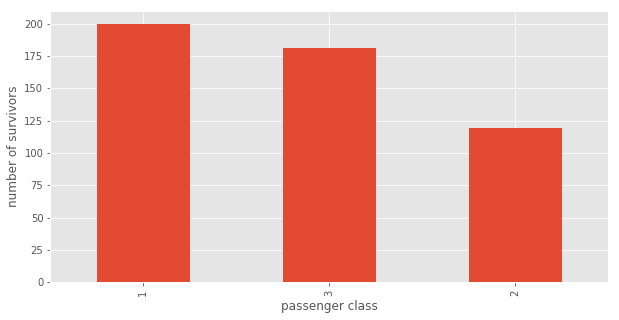

In [27]:
#how many survivors were there from each class?
ax = survivors['pclass'].sort_values(ascending=True).value_counts().plot(kind='bar', figsize=(10,5))
ax.set_ylabel('number of survivors')
ax.set_xlabel('passenger class')

## Let's examine things based on sex/gender

In [33]:
women = df[df['sex'] == 'female']
women.head()

,pclass,survived,last_name,first_name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home,destination,Unnamed: 16
0,1,1,Allen,Miss. Elisabeth Walton,female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",NaN,NaN
2,1,0,Allison,Miss. Helen Loraine,female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ","Chesterville, ON",NaN
4,1,0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ","Chesterville, ON",NaN
6,1,1,Andrews,Miss. Kornelia Theodosia,female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",NaN,NaN
8,1,1,Appleton,Mrs. Edward Dale (Charlotte Lamson),female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",NaN,NaN


In [34]:
women['first_name'].value_counts().head(10)

 Miss. Mary              7
 Miss. Kate              5
 Miss. Bertha            4
 Miss. Anna Sofia        3
 Miss. Ellen "Nellie"    3
 Miss. Anna              3
 Miss. Elizabeth         3
 Miss. Bridget           2
 Miss. Hanora "Nora"     2
 Miss. Katherine         2
Name: first_name, dtype: int64

In [29]:
women.shape

(466, 17)

In [ ]:
women['pclass'].value_counts()

In [ ]:
#what percentage of women survived?
women['survived'].value_counts() /466 * 100

In [ ]:
33

In [ ]:
female_survivors = women[women['survived'] == 1]
female_survivors.head()

In [ ]:
female_survivors['fare'].describe()

In [ ]:
female_survivors['pclass'].value_counts().plot(kind='bar')

In [35]:
men = df[df['sex'] == 'male']
men.head()

,pclass,survived,last_name,first_name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home,destination,Unnamed: 16
1,1,1,Allison,Master. Hudson Trevor,male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ","Chesterville, ON",NaN
3,1,0,Allison,Mr. Hudson Joshua Creighton,male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ","Chesterville, ON",NaN
5,1,1,Anderson,Mr. Harry,male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",NaN,NaN
7,1,0,Andrews,Mr. Thomas Jr,male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",NaN,NaN
9,1,0,Artagaveytia,Mr. Ramon,male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",NaN,NaN


In [36]:
men['first_name'].value_counts().head()

 Mr. John       13
 Mr. Patrick    10
 Mr. William    10
 Mr. James       9
 Mr. Joseph      7
Name: first_name, dtype: int64

In [ ]:
men.shape

In [ ]:
men['pclass'].value_counts()

In [ ]:
men['survived'].value_counts() / 843 * 100

In [ ]:
#let's look at just the survivors
male_survivors = men[men['survived'] == 1]
male_survivors.head()

In [ ]:
male_survivors['fare'].describe()

In [ ]:
male_survivors['pclass'].value_counts().plot(kind='bar')

In [ ]:
#groupby sex
df.groupby('sex')['survived'].count()

In [ ]:
#how many men? women?
df['sex'].value_counts()

In [ ]:
ax = df['sex'].value_counts().plot(kind='bar', title='Passengers aboard the Titanic')

ax.set_ylabel=('number of passengers')



# ax = kids.groupby(['parch']).sum().plot(kind='bar', y='survived', figsize=(20,10), title='Children Who Survived the Titanic Disaster')
# ax.set_xlabel('Number of adults a child was traveling with')
# ax.set_ylabel('Number of surviving children')

### What was the average age of passengers? The oldest? The youngest?

In [ ]:
#what was the average age of passengers?
df['age'].describe()

In [ ]:
#the average age of survivors
survivors['age'].describe()

### The average fare? The most expensive? 

In [ ]:
#average fare price? max?
df['fare'].describe()

In [ ]:
#avg fare paid by survivors
survivors['fare'].describe()

### The cheapest is 0 because there were crew members who did not pay for passage.

### How many passengers were traveling in 3rd class? 1st class?

In [ ]:
ax = df['pclass'].value_counts().plot(kind='bar', title='Passengers aboard the Titanic, by class')
ax.set_xlabel('passenger class')
ax.set_ylabel('number of passengers')

### What percentage of passengers survived?

In [ ]:
#so divide the number of surviving passengers (sum of survived) by 
#the total number of passengers and subtract that number
#from 100

df['survived'].sum() / 1309 * 100

Where were people coming from/going to?

In [ ]:
df['home.dest'].value_counts().head(20)

In [ ]:
embarked = df.groupby('embarked')
embarked.head()

Were you more likely to survive if you embarked in a certain place?

In [ ]:
df[df['embarked'] == 'C'].fare.describe()

In [ ]:
df[df['embarked'] == 'S'].fare.describe()

In [ ]:
df[df['embarked'] == 'Q'].fare.describe()

In [ ]:
embarked['survived'].value_counts()

In [ ]:
embarked['survived'].describe()

In [ ]:
#Cherbourg
print(150/270 * 100, '% of people who embarked in Cherbourg survived')

In [ ]:
#Queenstown
print(44/123 * 100, '% of people who embarked in Queenstown survived')

In [ ]:
#Southampton
print(304/914 * 100, '% of people who embarked in Southampton survived')

### How many children were traveling without a parent?

In [ ]:
#make a new dataset with just children (under 18)
kids = df[df['age'] < 18]
kids.head()



In [ ]:
kids.shape

In [ ]:
#all the children traveling without a parent
kids[kids['parch'] == 0].shape

In [ ]:
#so there were 154 children on board and 42 were 
#traveling without a parent
42/154 *100

### So there are 42 children in this dataset traveling without a parent (likely with a nanny). How many of them survived?

In [ ]:
kids[(kids['parch'] == 0) & (kids['survived'] == 1)].shape

In [ ]:
#the number of children who survived based on how many 
#people they were traveling with
#I know this is totally morbid.

ax = kids.groupby(['parch']).sum().plot(kind='bar', y='survived', figsize=(20,10), title='Children Who Survived the Titanic Disaster')
ax.set_xlabel('Number of adults a child was traveling with')
ax.set_ylabel('Number of surviving children')



### Were you more likely to survive if you were a man or a woman?

In [ ]:
#what percentage of female passenger perished? of male passengers?
females = df[(df['sex'] == 'female')]
females.head()

In [ ]:
females['survived'].sum() / 1309 * 100

In [ ]:
#what percentage of female passenger perished? of male passengers?
male = df[(df['sex'] == 'male')]

In [ ]:
male['survived'].sum() / 1309 * 100

So you were more than twice as likely to survive the sinking if you were a female.



## Let's switch gears and think about the fare prices. The original question I set out to answer was: if you paid a higher fare were you more likely to survive the sinking?


In [ ]:
#let's look at all of the different fares and how many people paid 
#each fare value. there are lots of random ones.
df['fare'].value_counts().sort_values(ascending=False).head()

In [ ]:
ax = df['fare'].plot(figsize=(20,10), kind='hist', bins=100, title='Fares paid for passage on the Titanic')
ax.set_xlabel('fare in british pounds')
ax.set_ylabel('number of tickets sold')

In [ ]:
# df['fare'].hist(bins=50)

### Let's group by the fare price. Were you more likely to survive if you paid more for a ticket?

In [ ]:
#what (column to group by), [what column you want info about], .what kind of info you want()
#let's look at this. groupby fare and get information on the survived column

fare_grouped = df.groupby('fare')['survived'].sum()
fare_grouped.head()

In [ ]:
#turn this series into a dataframe 

fare_grouped = fare_grouped.to_frame('fare_grouped')

In [ ]:
fare_grouped.head()

In [ ]:
#rename the columns immediately because otherwise
#it's confusing

fare_grouped.rename(columns={'fare_grouped':'number_survivors'}, inplace=True)
fare_grouped.head()

In [ ]:
#PLOT NUMBER OF PEOPLE WHO DIED BASED ON THE TICKET PRICE

#ticket price on y axis
# x axis is number of people who died
#maybe plot as a line graph

In [ ]:
fare_grouped.head()

In [ ]:
# def fare(c):
#     if c['rounded_fare'] < 50:
#         return 50
#     elif c['rounded_fare'] < 100:
#         return 100
#     elif c['rounded_fare'] < 200:
#         return 200
#     elif c['rounded_fare'] < 300:
#         return 300
#     elif c['rounded_fare'] < 400:
#         return 400
#     elif c['rounded_fare'] < 500:
#         return 500
#     else:
#         return 'other'
    
# fare_grouped['fare_categories'] = fare_grouped.apply(fare, axis=1)
# fare_grouped.head(400)

In [ ]:
# ax = fare_grouped.plot(kind='bar',
#                   x='fare_categories', 
#                   y='number_survivors', 
#                   figsize=(20,10)
#                   )
# ax.set_label = 'fare'

In [ ]:
#create a new column with the number of tickets purchased
#based on the value counts for the fare column in the OG df

fare_grouped['number_tickets_purchased'] = df['fare'].value_counts()
fare_grouped.head()

In [ ]:
fare_grouped.reset_index(inplace=True)

In [ ]:
#let's add a column with rounded fares so they 
#make a cleaner graph
fare_grouped['rounded_fare'] = fare_grouped['fare'].round() 
fare_grouped.head()

In [ ]:
#create a new column with the survival rate
#by dividing the # of survivors
#by the # of people who purchased a ticket at 
#that fare survivors / number_tickets_purchased

fare_grouped['survival_%_rate'] = (fare_grouped['number_survivors']/fare_grouped['number_tickets_purchased']) * 100

In [ ]:
fare_grouped['embarked'] = df['embarked']

In [ ]:
df.head()

In [ ]:
fare_grouped.head(30)

In [ ]:
# fare_grouped.plot(x='survival_%_rate', y='fare', kind='barh', figsize=(20,20))

In [ ]:
#in a misguided attempt to color the 
#scatterplot dots according to number of 
#tickets purchased I added a color column
# def color(c):
#     if c['number_tickets_purchased'] < 5:
#         return 'red'
#     elif c['number_tickets_purchased'] < 10:
#         return 'orange'
#     elif c['number_tickets_purchased'] < 15:
#         return 'yellow'
#     elif c['number_tickets_purchased'] < 20:
#         return 'green'
#     elif c['number_tickets_purchased'] < 30:
#         return 'blue'
#     elif c['number_tickets_purchased'] < 40:
#         return 'purple'
#     else:
#         return 'white'
    
# fare_grouped['color'] = fare_grouped.apply(color, axis=1)
# fare_grouped.head(400)

In [ ]:
sizes = fare_grouped.apply(lambda row: row['number_tickets_purchased'] * 100, axis=1)


#multiply by 100 just to make the dots visible.

#this turns the circle size into the number of tickets purchased * 100


ax = fare_grouped.plot(x='survival_%_rate', 
                  y='fare', 
                  kind='scatter', 
                  figsize=(20,20), 
                  alpha=0.5,
                  s=sizes)



ax.set_xlabel('percentage likelihood of survival', fontsize=18)
ax.set_ylabel('fare in british pounds', fontsize=18)
plt.savefig('survival.pdf')





### Here's some interesting info on fare prices and how they were calculated for this dataset:
http://www.statisticalconsultants.co.nz/blog/titanic-fare-data.html